In [1]:
import pandas as pd

In [225]:
zip_lat = pd.read_csv('ziplat.txt', dtype={'ZIP': object})

In [21]:
def convert_file(filename):
    with open(filename, 'r') as infile:
        reader = list(csv.reader(infile))
        line_index = 0
        for line in reader:
            try:
                clean_line = line[:-1]
                list_length = len(clean_line)
                zipcode = clean_line[0]
                if list_length > 3:
                    heat_wave_length = int((list_length - 3) / 2)
                    additional_days = clean_line[3:]
                    for x in range(0, heat_wave_length):          
                        reader.insert(line_index + 1, [zipcode, additional_days.pop(0), additional_days.pop(0)])
                        line_index += 1
                else:
                    line_index += 1
            except IndexError as e:
                line_index += 1
                pass

    with open(filename + "_converted.csv", "w", newline='') as outfile:
        writer = csv.writer(outfile)
        for line in reader:
            writer.writerow(line)



In [22]:
convert_file('max_temps_a.csv')
convert_file('max_temps_b.csv')
convert_file('max_temps_c.csv')
convert_file('max_temps_d.csv')
convert_file('max_temps_e.csv')
convert_file('max_temps_f.csv')
convert_file('max_temps_g.csv')
convert_file('max_temps_h.csv')
convert_file('max_temps_i.csv')

In [25]:
max_temps_a = pd.read_csv('max_temps_a.csv_converted.csv', usecols=[0,1,2], names=['zipcode','date','temp'])
max_temps_b = pd.read_csv('max_temps_b.csv_converted.csv', usecols=[0,1,2], names=['zipcode','date','temp'])
max_temps_c = pd.read_csv('max_temps_c.csv_converted.csv', usecols=[0,1,2], names=['zipcode','date','temp'])
max_temps_d = pd.read_csv('max_temps_d.csv_converted.csv', usecols=[0,1,2], names=['zipcode','date','temp'])
max_temps_e = pd.read_csv('max_temps_e.csv_converted.csv', usecols=[0,1,2], names=['zipcode','date','temp'])
max_temps_f = pd.read_csv('max_temps_f.csv_converted.csv', usecols=[0,1,2], names=['zipcode','date','temp'])
max_temps_g = pd.read_csv('max_temps_g.csv_converted.csv', usecols=[0,1,2], names=['zipcode','date','temp'])
max_temps_h = pd.read_csv('max_temps_h.csv_converted.csv', usecols=[0,1,2], names=['zipcode','date','temp'])
max_temps_i = pd.read_csv('max_temps_i.csv_converted.csv', usecols=[0,1,2], names=['zipcode','date','temp'])

In [28]:
full_df = pd.concat([max_temps_a, max_temps_b, max_temps_c, max_temps_d, max_temps_e, 
                    max_temps_f, max_temps_g, max_temps_h, max_temps_i])

In [136]:
grouped_df = full_df.sort_values(['date', 'zipcode'])[['zipcode', 'temp', 'year']].groupby(['year','zipcode']).max()


In [141]:
max_temp_by_year_df = grouped_df.reset_index()

In [147]:
max_2007_df = max_temp_by_year_df[max_temp_by_year_df.year == 2007]

In [148]:
max_2007_df.head()

,year,zipcode,temp
0,2007,1002,33.6
1,2007,1011,31.8
2,2007,1013,34.1
3,2007,1098,31.9
4,2007,1108,34.3


In [29]:
full_df.to_csv('max_temps_merged.csv', index=False)

In [33]:
full_df.sort_values(['zipcode', 'date']).to_csv('max_temps.csv', index=False)

In [39]:
full_df.date = pd.to_datetime(full_df.date)

In [65]:
full_df.loc[:, 'year'] = full_df.date.dt.year

In [74]:
max_temp_by_year = full_df.groupby(['year', 'zipcode'])['temp'].max().reset_index()

In [90]:
max_temp_by_year.loc[:,'temp'] = max_temp_by_year.temp.astype(float)

In [15]:
full_df = pd.read_csv('max_temps.csv', parse_dates=['date'])

In [31]:
sorted_df = full_df.sort_values('date').set_index(['date','zipcode'])

In [41]:
date_index_df = full_df.sort_values('date').set_index('date')

In [240]:
max_2007_df.loc[:,"zipcode"] = max_2007_df.zipcode.apply(lambda x: str(x).zfill(5))
max07_df =  max_2007_df.rename(columns={'zipcode':'ZIP'}).merge(zip_lat)
max07_df.head()

,year,ZIP,temp,LAT,LNG
0,2007,01002,33.6,42.364061,-72.458739
1,2007,01011,31.8,42.300281,-72.968716
2,2007,01013,34.1,42.154904,-72.602804
3,2007,01098,31.9,42.394315,-72.943115
4,2007,01108,34.3,42.080692,-72.560791


In [246]:
max_temp_by_year_df.loc[:,"zipcode"] = max_temp_by_year_df.zipcode.apply(lambda x: str(x).zfill(5))
maxdf = max_temp_by_year_df.rename(columns={'zipcode':'ZIP'}).merge(zip_lat)
maxdf.head()

,year,ZIP,temp,LAT,LNG
0,2007,01002,33.6,42.364061,-72.458739
1,2008,01002,35.1,42.364061,-72.458739
2,2009,01002,32.6,42.364061,-72.458739
3,2010,01002,36.5,42.364061,-72.458739
4,2011,01002,36.8,42.364061,-72.458739


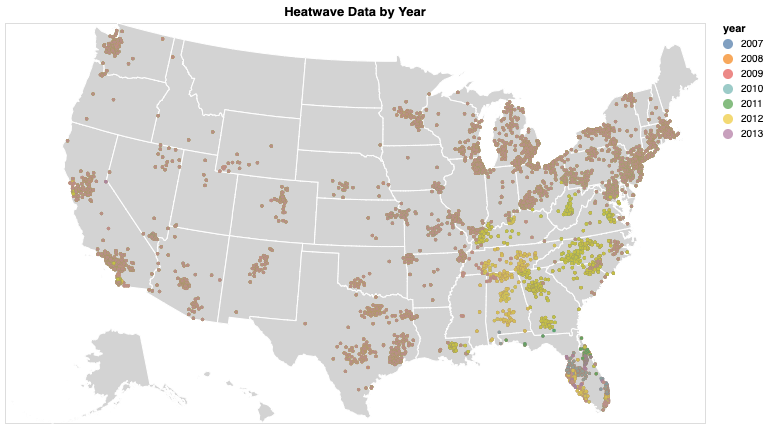

In [293]:
# Heatwave by zipcode by year chart
heat_wave = maxdf
states = alt.topo_feature(data.us_10m.url, feature='states')
color = alt.condition(slider_selection,
                    alt.Color('year:N'),
                    alt.value('lightgray'))
year_slider = alt.binding_range(min=2007, max=2013, step=1)
slider_selection = alt.selection_single(bind=year_slider, fields=['year'], name="year")



background = alt.Chart(states).mark_geoshape(
    fill='lightgray',
    stroke='white'
).properties(
    width=700,
    height=400
).project('albersUsa')


# airport positions on background
points = alt.Chart(heat_wave).mark_circle().encode(
    longitude='LNG:Q',
    latitude='LAT:Q',
    size=alt.value(10),
    color=color
).add_selection(slider_selection).transform_filter(slider_selection).properties(title='Heatwave Data by Year')

background + points

In [251]:
alt.data_transformers.enable('json')

DataTransformerRegistry.enable('json')

In [263]:
full_df.head()

,zipcode,date,temp,year
0,1002,2007-06-27,33.6,2007
1,1002,2007-06-28,33.5,2007
2,1002,2007-09-08,31.9,2007
3,1002,2007-09-09,32.7,2007
4,1002,2007-09-26,30.1,2007


In [266]:
# s = df.groupby('ID').Date.diff().dt.days.fillna(1).ne(1).cumsum()
# df.groupby(['ID', s]).size().reset_index(level=1, drop=True)

full_df.loc[:,'zipcode'] = full_df.loc[:,'zipcode'].apply(lambda x: str(x).zfill(5))
full_df = full_df.rename(columns={'zipcode':'ZIP'})


In [275]:
s= full_df.groupby('ZIP').date.diff().dt.days.fillna(1).ne(1).cumsum()


ZIP
01002    2
01002    2
01002    2
01002    4
01002    1
01002    2
01002    3
01002    1
01002    5
01002    1
01002    2
01002    1
01002    3
01002    1
01002    3
01002    1
01002    2
01002    2
01002    2
01002    1
01002    3
01002    1
01011    1
01011    2
01011    1
01011    1
01011    1
01011    2
01011    3
01011    4
        ..
98926    1
98926    1
98926    2
98926    1
98926    1
98926    2
98926    1
98926    1
98926    5
99141    3
99141    1
99141    5
99141    1
99141    3
99141    4
99141    2
99141    1
99141    1
99141    1
99141    1
99141    2
99141    1
99141    1
99141    2
99141    5
99141    2
99141    1
99141    2
99141    2
99141    4
Length: 119698, dtype: int64

In [286]:
heat_length_df = (full_df.groupby(['ZIP',s]).size()
 .reset_index(level=1,drop=True)
 .reset_index().groupby('ZIP')
 .max().reset_index().merge(zip_lat)).rename(columns={0:'LENGTH'})

In [287]:
heat_length_df

,ZIP,LENGTH,LAT,LNG
0,01002,5,42.364061,-72.458739
1,01011,5,42.300281,-72.968716
2,01013,5,42.154904,-72.602804
3,01098,5,42.394315,-72.943115
4,01108,5,42.080692,-72.560791
5,01129,5,42.118690,-72.488200
6,01453,5,42.519977,-71.763202
7,01545,5,42.284767,-71.714228
8,01568,5,42.176526,-71.603588
9,01571,5,42.053778,-71.935075


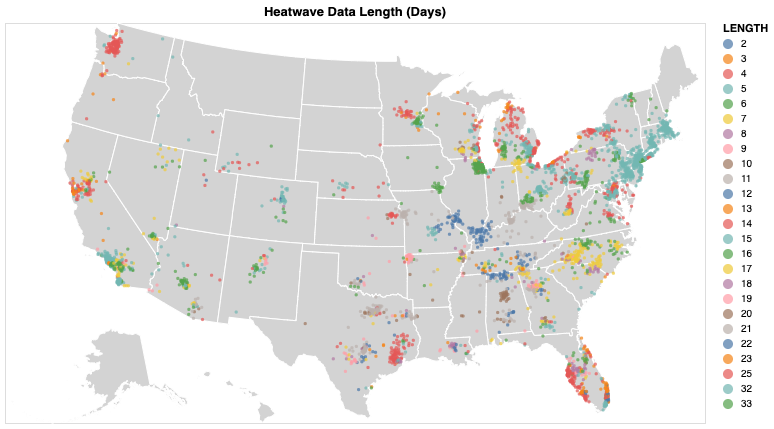

In [292]:
heat_wave_length = heat_length_df
states = alt.topo_feature(data.us_10m.url, feature='states')
len_slider = alt.binding_range(min=2, max=33, step=1)
len_slider_selection = alt.selection_single(bind=len_slider, fields=['LENGTH'], name="LENGTH")
color = alt.condition(len_slider_selection,
                    alt.Color('LENGTH:N'),
                    alt.value('lightgray'))





background = alt.Chart(states).mark_geoshape(
    fill='lightgray',
    stroke='white'
).properties(
    width=700,
    height=400
).project('albersUsa')


# airport positions on background
points = (alt.Chart(heat_length_df).mark_circle().encode(
    longitude='LNG:Q',
    latitude='LAT:Q',
    size=alt.value(10),
    color=color
).add_selection(len_slider_selection)
          .transform_filter(len_slider_selection)
          .properties(title='Heatwave Data Length (Days)'))

background + points